Colab 🤩 -> https://drive.google.com/file/d/1Cy7cA17WXWR9zsW7HYaXHYlbhfK0BPWo/view?usp=sharing

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [103]:
E_0 = 0.511
Epsilon = 0.75 
Teta_0 = 60

lambda_ = (6.63 * 10 ** -34) * 3 * 10 ** 8 / Epsilon
lambda_

2.6519999999999994e-25

In [104]:
femkameter =  24 * 10 ** -15 * 10 ** 9
# _lambda = [86, 84, 83, 82.5, 0, 0]
# _lambda = map(lambda x: x * femkameter, _lambda)
# _lambda = list(_lambda)

Teta_1, Teta_2, Teta_3, Teta_4, Teta_5, Teta_6 = 0, 30, 60, 90, 120, 160
Δlambda_1, Δlambda_2, Δlambda_3, Δlambda_4, Δlambda_5, Δlambda_6  = 0, 9-5, 25-5, 42-4, 65-4, 79-3
lambda_e_1, lambda_e_2, lambda_e_3, lambda_e_4, lambda_e_5, lambda_e_6 = 0, 0, 0, 0, 0, 0

data = {
    "Teta": [Teta_1, Teta_2, Teta_3, Teta_4, Teta_5, Teta_6],
    "Δlambda": [Δlambda_1, Δlambda_2, Δlambda_3, Δlambda_4, Δlambda_5, Δlambda_6],
    "lambda_e": [lambda_e_1, lambda_e_2, lambda_e_3, lambda_e_4, lambda_e_5, lambda_e_6]
}

df = pd.DataFrame(data)

df["Δlambda"] = df["Δlambda"].apply(lambda x: x * femkameter)
# df["lambda_e"] = df["Δlambda"] + _lambda
df['lambda_e'] = df['Δlambda'].apply(lambda df: lambda_ + df)

df.T

,0,1,2,3,4,5
Teta,0.000000e+00,30.000000,60.00000,90.000000,120.000000,160.000000
Δlambda,0.000000e+00,0.000096,0.00048,0.000912,0.001464,0.001824
lambda_e,2.652000e-25,0.000096,0.00048,0.000912,0.001464,0.001824


In [105]:
lambda_c = 0.024 * 10 ** -10
Teta = []
for i in range(0,180+1,20):
	Teta.append(i)

df_alt = {"Teta": Teta,
			"cos(Teta)": 1 - np.cos(Teta),
			"Δlambda_p": ((1 - np.cos(Teta)) * lambda_c + lambda_) * 10 ** 9}

df_alt = pd.DataFrame(df_alt)
df_alt.T

,0,1,2,3,4,5,6,7,8,9
Teta,0.000000e+00,20.000000,40.000000,60.000000,80.000000,100.000000,120.000000,140.000000,160.000000,180.000000
cos(Teta),0.000000e+00,0.591918,1.666938,1.952413,1.110387,0.137681,0.185819,1.197814,1.975629,1.598460
Δlambda_p,2.652000e-16,0.001421,0.004001,0.004686,0.002665,0.000330,0.000446,0.002875,0.004742,0.003836


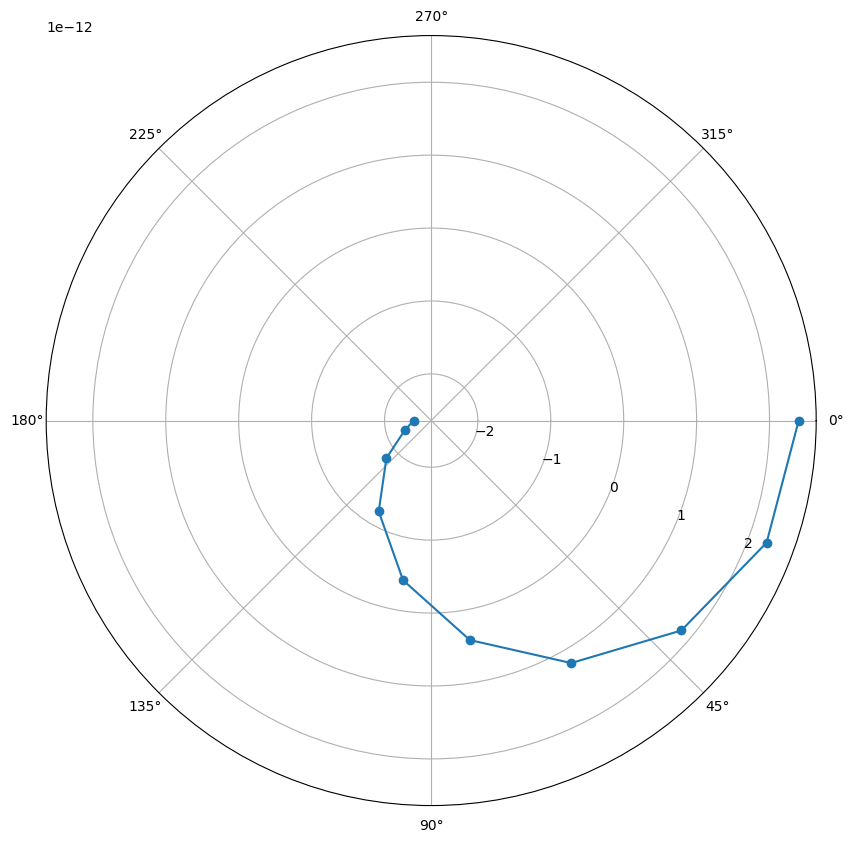

In [115]:
df_polar = {
    "Teta": Teta,
    "cos(Teta)": np.cos(np.radians(Teta)), 
    "Δlambda_p": np.cos(np.radians(Teta)) * lambda_c
}

df_polar = pd.DataFrame(df_polar)

fig = plt.figure()
fig.set_size_inches(16,10)
ax = fig.add_subplot(111, projection='polar')

ax.plot(np.radians(df_polar["Teta"]), df_polar["Δlambda_p"], marker='o')

ax.set_theta_zero_location("E")
ax.set_theta_direction(-1) 

plt.show()

# как рсчитывать эти епсилоны я хз

In [107]:
mean_Δlambda_p = (sum(df_alt["Δlambda_p"])/df_alt.shape[1])
mean_Δlambda_e_2 = sum(df["lambda_e"])/df_alt.shape[1]
mean_Δlambda_e_1 = sum(df["lambda_e"])/df.shape[1]

Epsilon_Δlambda_2 = (abs(mean_Δlambda_p - lambda_e_1) / mean_Δlambda_p) * 100
Epsilon_Δlambda_2

100.0

In [108]:
Eplison_alt = Epsilon / ((Epsilon/E_0) * (1 - np.cos(Teta_0) + 1))
Eplison_alt

0.17307876756731547

In [109]:
# Note: Перевести в систему СИ

c = 3 * 108
p_f = Epsilon / c 
p_fat = Eplison_alt / c
print (f"p_f = {p_f}, p_fat = {p_fat}")

p_f = 0.0023148148148148147, p_fat = 0.0005341937270596156


In [110]:
p_e = (p_f ** 2 - 2 * p_f * p_fat * np.cos(Teta_0) + p_fat ** 2) ** (1/2)
p_e

0.0028282788590067542

In [111]:
m_0 = 9.109 * 10 ** -31 
V = p_e * c / (((m_0 * c) ** 2 + p_e ** 2) ** (1/2))
V

324.0

![победа](https://i.imgur.com/Yjg3OlT.gif)